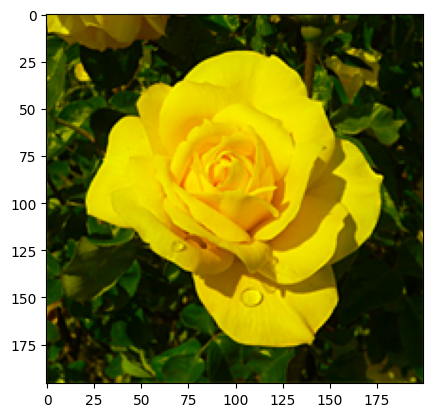

In [130]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img_BGR = cv2.imread("../data/blomma.png")

flower = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(flower)

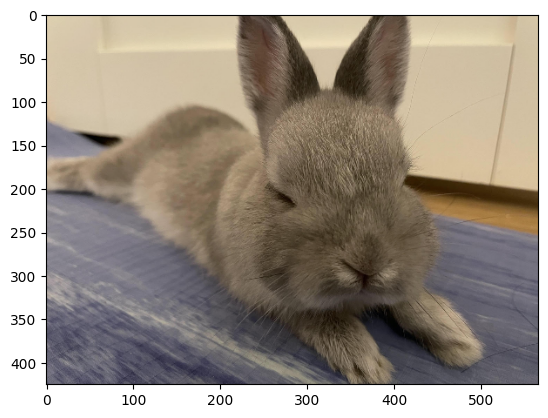

In [131]:
img_BGR = cv2.imread("../data/bella.jpeg")
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

rabbit = cv2.resize(img, (int(img.shape[1]*0.4), int(img.shape[0]*0.4)))
plt.imshow(rabbit)

(196, 200, 3)
[[0.88617915 0.78631457 0.        ]
 [0.87165595 0.65272684 0.        ]
 [0.88617915 0.78631457 0.        ]
 ...
 [0.03776747 0.06824382 0.        ]
 [0.09853043 0.14131937 0.        ]
 [0.23723267 0.27731241 0.        ]]


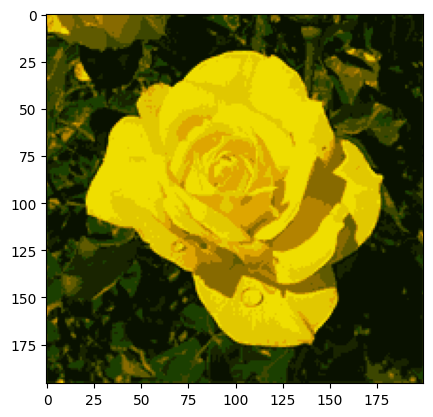

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
print(flower.shape)

X = flower.reshape(-1,3)

X.shape

scaler = MinMaxScaler()

scaled_X =scaler.fit_transform(X)

kmean = KMeans(10)
kmean.fit(scaled_X)

# print("Centers: ", kmean.cluster_centers_)
# print("labels: ", kmean.labels_)

quantized_color_space = kmean.cluster_centers_[kmean.labels_]
print(quantized_color_space)

quantized = quantized_color_space.reshape(flower.shape)

plt.imshow(quantized)

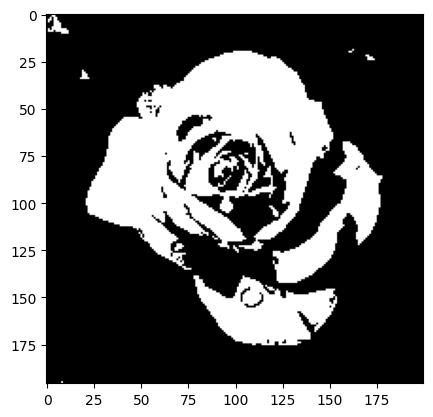

In [133]:
mask = (quantized[:,:,1]>.75)
plt.imshow(mask, cmap="gray")

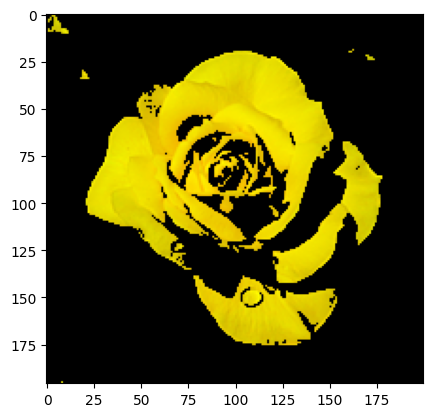

In [134]:
segmented_flower = (mask[:,:,None]*flower)
plt.imshow(segmented_flower)

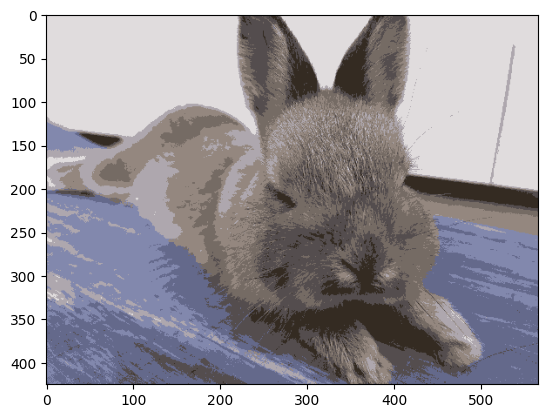

In [135]:
X = rabbit.reshape(-1,3)
scaled_X = scaler.fit_transform(X)

kmean = KMeans(8)
kmean.fit(scaled_X)
quantized_color_space = kmean.cluster_centers_[kmean.labels_]
quantized = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized)